In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from clustring import KMeans
import pandas

style.use('ggplot')

In [2]:
# load data
data = pandas.read_csv("species.tsv", sep="\t", index_col=0)
data = data.T
data = data/100
data.head()

ID,Bifidobacterium_animalis,Bifidobacterium_pseudolongum,Corynebacterium_maris,Corynebacterium_stationis,Corynebacterium_urealyticum,Collinsella_intestinalis,Collinsella_stercoris,Adlercreutzia_equolifaciens,Asaccharobacter_celatus,Enterorhabdus_caecimuris,...,Psychrobacter_pasteurii,Pseudomonas_antarctica,Pseudomonas_fluorescens_group,Pseudomonas_yamanorum,Stenotrophomonas_maltophilia,Stenotrophomonas_rhizophila,Pseudomonas_geniculata,Proteobacteria_bacterium_CAG_139,Mycoplasma_hyorhinis,Akkermansia_muciniphila
C1,0.000000,0.038207,0.0,0.008136,0.0,0.0,0.0,0.005611,0.007802,0.0,...,0.003719,0.000672,0.000448,0.002880,0.0,0.0,0.000000,0.000000,0.0,0.199219
C2,0.000000,0.000000,0.0,0.004405,0.0,0.0,0.0,0.001033,0.001237,0.0,...,0.001744,0.003263,0.000000,0.003303,0.0,0.0,0.000000,0.000000,0.0,0.000576
C3,0.000000,0.023855,0.0,0.006397,0.0,0.0,0.0,0.002341,0.001720,0.0,...,0.002822,0.000716,0.000000,0.001251,0.0,0.0,0.000466,0.000244,0.0,0.017808
C4,0.000000,0.000000,0.0,0.007601,0.0,0.0,0.0,0.005420,0.004578,0.0,...,0.003498,0.000000,0.000000,0.003317,0.0,0.0,0.000000,0.000000,0.0,0.325555
C5,0.000729,0.126646,0.0,0.001435,0.0,0.0,0.0,0.002406,0.002436,0.0,...,0.000269,0.000000,0.000027,0.000000,0.0,0.0,0.000000,0.000829,0.0,0.018964


In [3]:
# data preprocessing
pca = PCA(n_components=2)
pcs = pca.fit_transform(data)

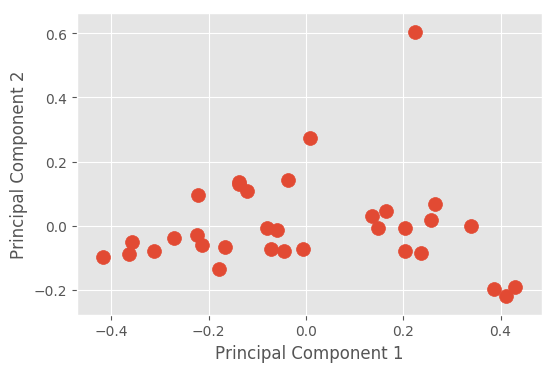

In [4]:
fig = plt.figure(dpi=100)
plt.scatter(pcs[:, 0], pcs[:, 1], s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [5]:
model = KMeans()
model.fit(pcs)

In [21]:
from palettable.colorbrewer.qualitative import Set3_5
colors = Set3_5.mpl_colors

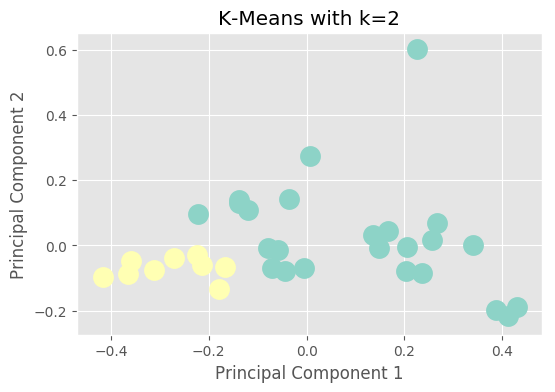

In [7]:
fig = plt.figure(dpi=100)
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], color=color, s=100, linewidths=5, label="aa")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means with k=2")
plt.show()

In [17]:
sse = []
for k in range(1,11):
    model = KMeans(k=k)
    model.fit(pcs)
    sse.append(model.sse())

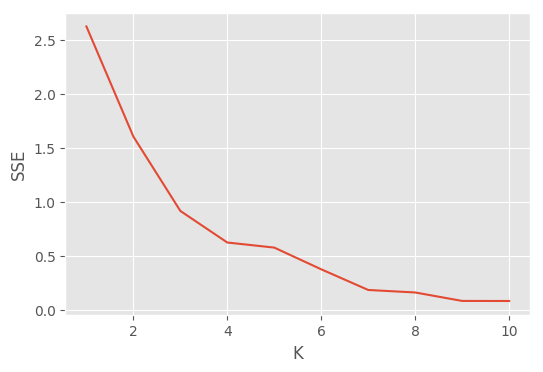

In [18]:
fig = plt.figure(dpi=100)
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(range(1,11), sse)

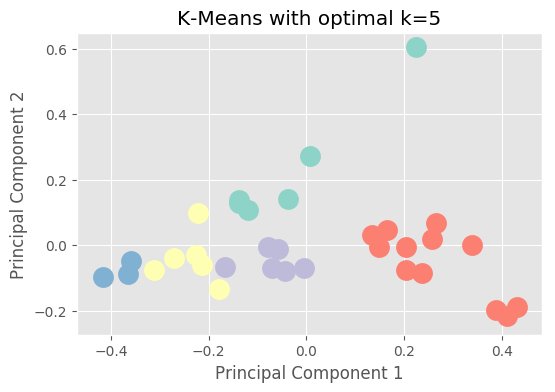

In [24]:
model = KMeans(k=5)
model.fit(pcs)
fig = plt.figure(dpi=100)
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], color=color, s=100, linewidths=5, label="aa")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means with optimal k=5")
plt.show()